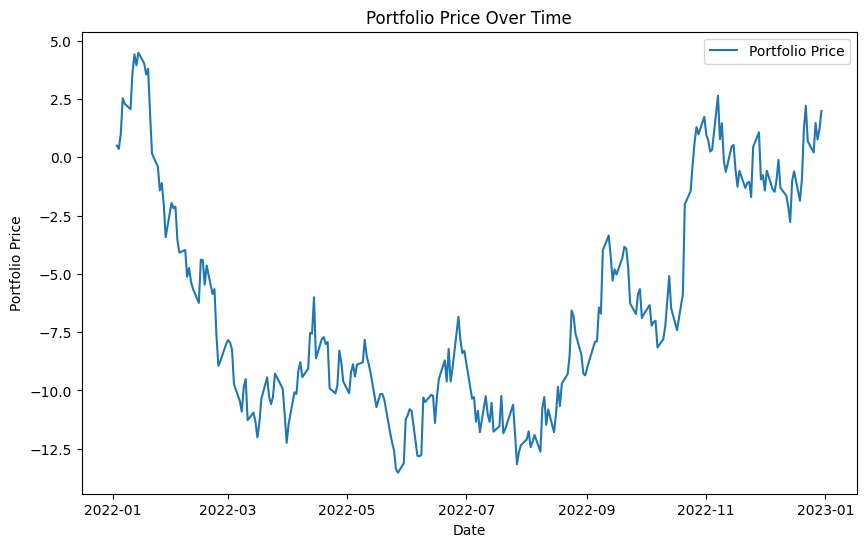

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime, date
from datetime import timedelta

# Simulate data
np.random.seed(42)
dates = pd.date_range('2022-01-01', '2022-12-31', freq='B')
portfolio_prices = np.cumsum(np.random.randn(len(dates)))

df = pd.DataFrame({'Date': dates, 'Price': portfolio_prices})

# Plot the portfolio prices
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], label='Portfolio Price')
plt.title('Portfolio Price Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Price')
plt.legend()
plt.show()


In [59]:
# Data preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_scaled'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1))
df

,Date,Price,Price_scaled
0,2022-01-03,0.496714,0.778765
1,2022-01-04,0.358450,0.771087
2,2022-01-05,1.006138,0.807055
3,2022-01-06,2.529168,0.891632
4,2022-01-07,2.295015,0.878629
...,...,...,...
255,2022-12-26,0.202269,0.762414
256,2022-12-27,1.469181,0.832769
257,2022-12-28,0.761511,0.793470
258,2022-12-29,1.205330,0.818116


In [60]:
# Create sequences for the LSTM model
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        target.append(label)
    return np.array(sequences), np.array(target)

sequence_length = 10  # Choose an appropriate sequence length
X, y = create_sequences(df['Price_scaled'], sequence_length)

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
7/7 - 4s - loss: 0.0979 - val_loss: 0.0231 - 4s/epoch - 556ms/step
Epoch 2/50
7/7 - 0s - loss: 0.0198 - val_loss: 0.0189 - 79ms/epoch - 11ms/step
Epoch 3/50
7/7 - 0s - loss: 0.0196 - val_loss: 0.0105 - 82ms/epoch - 12ms/step
Epoch 4/50
7/7 - 0s - loss: 0.0109 - val_loss: 0.0072 - 76ms/epoch - 11ms/step
Epoch 5/50
7/7 - 0s - loss: 0.0108 - val_loss: 0.0072 - 109ms/epoch - 16ms/step
Epoch 6/50
7/7 - 0s - loss: 0.0092 - val_loss: 0.0072 - 92ms/epoch - 13ms/step
Epoch 7/50
7/7 - 0s - loss: 0.0087 - val_loss: 0.0083 - 94ms/epoch - 13ms/step
Epoch 8/50
7/7 - 0s - loss: 0.0083 - val_loss: 0.0075 - 92ms/epoch - 13ms/step
Epoch 9/50
7/7 - 0s - loss: 0.0081 - val_loss: 0.0074 - 75ms/epoch - 11ms/step
Epoch 10/50
7/7 - 0s - loss: 0.0079 - val_loss: 0.0078 - 79ms/epoch - 11ms/step
Epoch 11/50
7/7 - 0s - loss: 0.0078 - val_loss: 0.0078 - 93ms/epoch - 13ms/step
Epoch 12/50
7/7 - 0s - loss: 0.0077 - val_loss: 0.0076 - 94ms/epoch - 13ms/step
Epoch 13/50
7/7 - 0s - loss: 0.0076 - val_loss: 0

In [63]:
#saving the model
model.save('generated_model.h5')

#load the model
# to load the model we will uncomment the below line
#model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/VLG_Stock_price_pred/generated_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [64]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error: {mse}')

2/2 [==============================] - 0s 6ms/step
Mean Squared Error: 1.4590821027750465


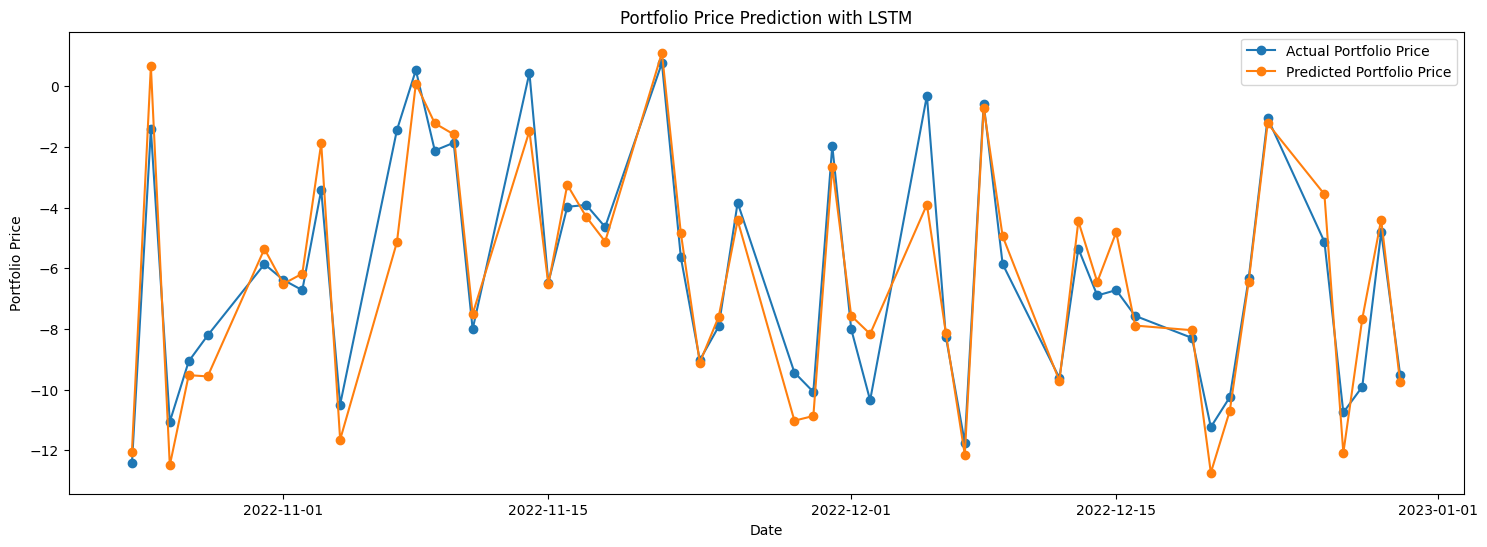

In [65]:
# Plot the predicted vs. actual portfolio prices
plt.figure(figsize=(18, 6))
plt.plot(df['Date'].iloc[-len(y_test_inv):], y_test_inv, label='Actual Portfolio Price', marker='o')
plt.plot(df['Date'].iloc[-len(y_test_inv):], y_pred_inv, label='Predicted Portfolio Price', marker='o')
plt.title('Portfolio Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Portfolio Price')
plt.legend()
plt.show()


8/8 [==============================] - 0s 5ms/step


<ipython-input-68-37c0b5ffc52f>:41: UserWarning: Discarding nonzero nanoseconds in conversion.
  future_dates = pd.date_range(start=pd.Timestamp(last_date) + pd.DateOffset(day=1), periods=len(future_predictions), freq='B')


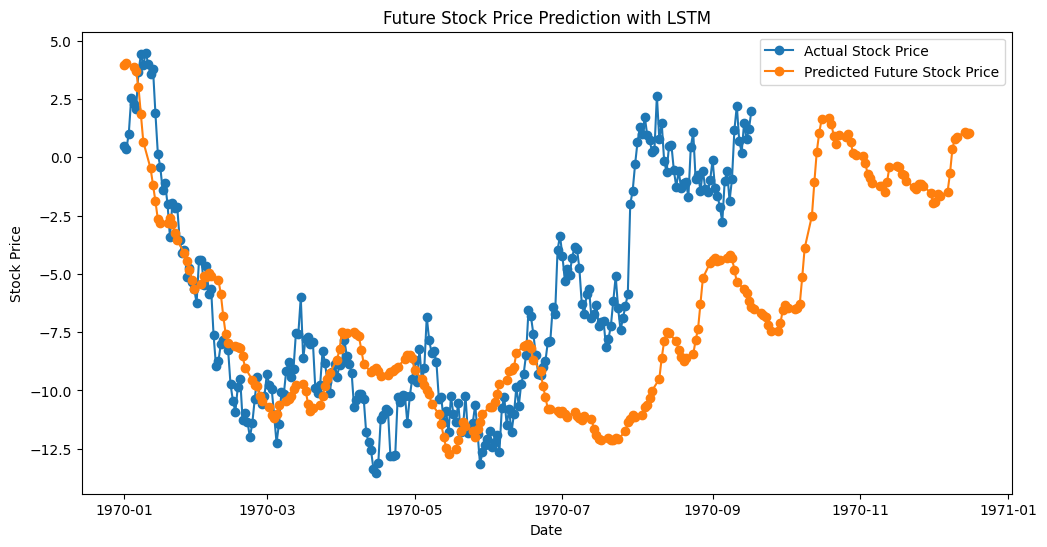

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming 'df' is your DataFrame with historical stock data
# Extract the 'Close' prices for prediction
data = df['Price'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        sequences.append(seq)
    return np.array(sequences)

# Choose an appropriate sequence length
sequence_length = 10

# Create sequences for the LSTM model
future_sequence = create_sequences(data_scaled, sequence_length)

# Reshape input data for LSTM (samples, time steps, features)
future_sequence = future_sequence.reshape((future_sequence.shape[0], future_sequence.shape[1], 1))

# Predict future stock prices
future_predictions_scaled = model.predict(future_sequence)

# Inverse transform the scaled predictions
future_predictions = scaler.inverse_transform(future_predictions_scaled)

# Generate future dates for the predictions
last_date = df.index[-1]
future_dates = pd.date_range(start=pd.Timestamp(last_date) + pd.DateOffset(day=1), periods=len(future_predictions), freq='B')

# Plot the original and predicted stock prices, including future predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Actual Stock Price', marker='o')
plt.plot(future_dates, future_predictions, label='Predicted Future Stock Price', marker='o')
plt.title('Future Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


<h2><b>_______MODEL-2______</b>

In this model we are making a more accurate and precise model that predicts for more present value and can also be used to predict for future days as well, we can also make use of our potfolio construction algorithm as well and load the wights from the MCS file.

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime, date
from datetime import timedelta
import yfinance as yf


In [70]:
ticker_list = []
n1 = input('enter the number of stocks: ')
number_1 = int(n1)

while len(ticker_list) < number_1:
    item = input('Enter item to buy: ')

    # make sure item is not in list before appending
    if item not in ticker_list:
        ticker_list.append(item)

enter the number of stocks: 7
Enter item to buy: SPY
Enter item to buy: BND
Enter item to buy: GLD
Enter item to buy: AAPL
Enter item to buy: BHP
Enter item to buy: MSFT
Enter item to buy: QQQ


In [71]:
end_date = datetime.now()
start_date = end_date - timedelta(days = 5000)

def get_stock_data(stock_list,weight, start_date, end_date):
  D = {}
  for i in range(len(weight)) :
    D[i] = yf.download(stock_list[i], start_date, end_date)

  df = pd.DataFrame()
  for i in range(len(weight)-1) :
    df = df.add(D[i].mul(weight[i]), fill_value = 0)

  return df

In [72]:
#optimized weights
weights = [2.54069740e-18, 1.08681502e-02, 9.34694337e-01, 1.06331466e-17, 0.00000000e+00, 9.15021831e-18, 5.44375127e-02]

In [73]:
df = get_stock_data(ticker_list, weights, start_date, end_date)
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-05-06,108.936749,111.757460,108.879795,111.622469,111.347071,4.726231e+07
2010-05-07,110.828415,111.991455,109.984580,111.414661,111.139950,3.204284e+07
2010-05-10,110.692994,111.069807,110.047943,110.759400,110.484999,2.658253e+07
2010-05-11,112.527059,113.845198,112.067104,113.648805,113.374026,3.433919e+07
2010-05-12,114.228202,115.125834,113.749115,114.338085,114.064063,3.059207e+07
...,...,...,...,...,...,...
2024-01-08,175.775661,177.209546,175.681751,176.395156,176.395156,5.895391e+06
2024-01-09,177.151278,177.246492,176.262995,176.451127,176.451127,4.208918e+06
2024-01-10,176.648832,176.929786,175.776747,176.047802,176.047802,4.282013e+06


In [74]:
# Use the closing prices for prediction
data = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)


In [75]:
# Create sequences for the LSTM model
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        target.append(label)
    return np.array(sequences), np.array(target)

sequence_length = 10  # Choose an appropriate sequence length
X, y = create_sequences(data_scaled, sequence_length)

In [76]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Build the LSTM model
model_2 = Sequential()
model_2.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model_2.add(Dense(1))
model_2.compile(optimizer='adam', loss='mean_squared_error')

In [78]:
# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
model_2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Make predictions on the test set
y_pred = model_2.predict(X_test)

Epoch 1/50
86/86 - 3s - loss: 0.0156 - val_loss: 9.2758e-04 - 3s/epoch - 37ms/step
Epoch 2/50
86/86 - 1s - loss: 8.5932e-04 - val_loss: 8.7440e-04 - 580ms/epoch - 7ms/step
Epoch 3/50
86/86 - 1s - loss: 8.2969e-04 - val_loss: 9.2134e-04 - 574ms/epoch - 7ms/step
Epoch 4/50
86/86 - 1s - loss: 8.3638e-04 - val_loss: 8.4655e-04 - 600ms/epoch - 7ms/step
Epoch 5/50
86/86 - 1s - loss: 7.8612e-04 - val_loss: 8.6162e-04 - 588ms/epoch - 7ms/step
Epoch 6/50
86/86 - 1s - loss: 7.6573e-04 - val_loss: 8.6184e-04 - 610ms/epoch - 7ms/step
Epoch 7/50
86/86 - 1s - loss: 7.5424e-04 - val_loss: 8.2861e-04 - 588ms/epoch - 7ms/step
Epoch 8/50
86/86 - 1s - loss: 7.2650e-04 - val_loss: 7.5660e-04 - 606ms/epoch - 7ms/step
Epoch 9/50
86/86 - 1s - loss: 7.0842e-04 - val_loss: 7.3003e-04 - 570ms/epoch - 7ms/step
Epoch 10/50
86/86 - 1s - loss: 6.7497e-04 - val_loss: 7.4744e-04 - 591ms/epoch - 7ms/step
Epoch 11/50
86/86 - 1s - loss: 6.6396e-04 - val_loss: 7.9127e-04 - 619ms/epoch - 7ms/step
Epoch 12/50
86/86 - 1s - 

In [82]:
model_2.save('Gen_model_2.h5')

#load the model by un commenting the below line
#model_2 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/VLG_Stock_price_pred/generated_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [79]:
# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.6953092846034763


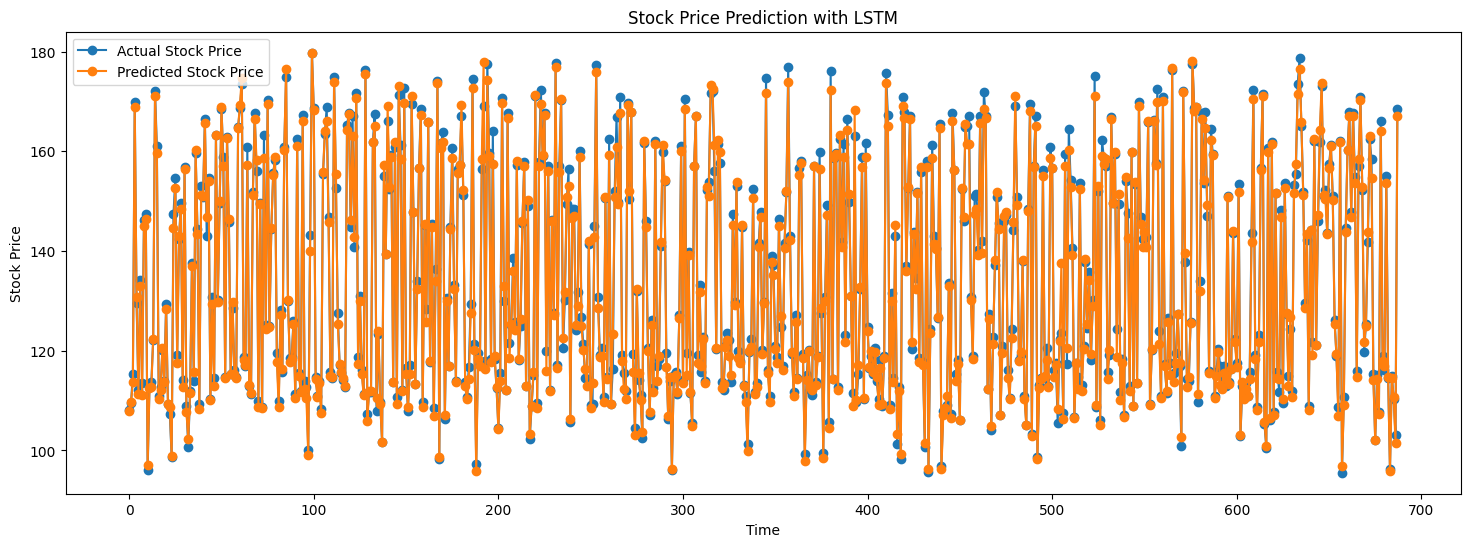

In [80]:
# Plot the predicted vs. actual stock prices
plt.figure(figsize=(18, 6))
plt.plot(y_test_inv, label='Actual Stock Price', marker='o')
plt.plot(y_pred_inv, label='Predicted Stock Price', marker='o')
plt.title('Stock Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

108/108 [==============================] - 0s 4ms/step


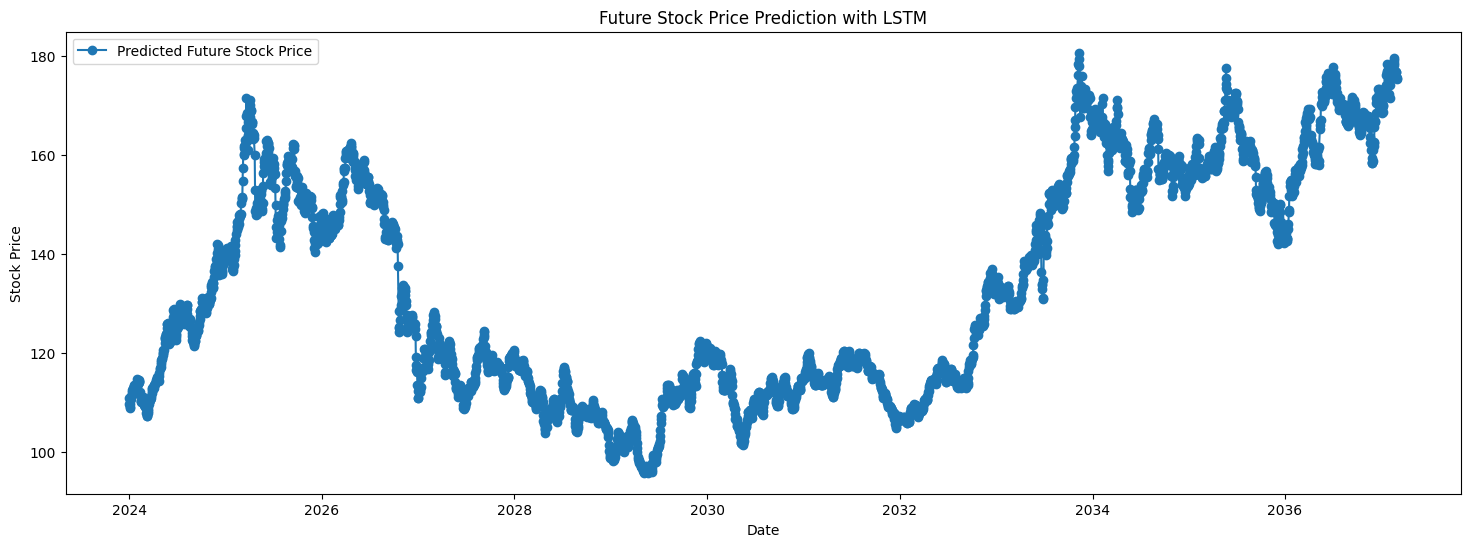

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming 'df' is your DataFrame with historical stock data
# Extract the 'Close' prices for prediction
data = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        sequences.append(seq)
    return np.array(sequences)

# Choose an appropriate sequence length
sequence_length = 10

# Create sequences for the LSTM model
future_sequence = create_sequences(data_scaled, sequence_length)

# Reshape input data for LSTM (samples, time steps, features)
future_sequence = future_sequence.reshape((future_sequence.shape[0], future_sequence.shape[1], 1))

# Predict future stock prices
future_predictions_scaled = model_2.predict(future_sequence)

# Inverse transform the scaled predictions
future_predictions = scaler.inverse_transform(future_predictions_scaled)

# Generate future dates for the predictions
last_date = df.index[-1]
future_dates = pd.date_range(start=pd.Timestamp(last_date) + pd.DateOffset(day=1), periods=len(future_predictions), freq='B')

# Plot the original and predicted stock prices, including future predictions
plt.figure(figsize=(18, 6))
#plt.plot(df.index, df['Close'], label='Actual Stock Price', marker='o')
plt.plot(future_dates, future_predictions, label='Predicted Future Stock Price', marker='o')
plt.title('Future Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
